# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [15]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-11 15:45:05--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  22.0MB/s    in 0.4s    

2022-08-11 15:45:06 (22.0 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [21]:
df = pd.read_csv('各类别准确率评估指标.csv')

In [22]:
df

,类别,precision,recall,f1-score,support
0,丝瓜,0.681818,0.810811,0.740741,37.0
1,人参果,0.846154,0.916667,0.880000,36.0
2,佛手瓜,0.961538,0.781250,0.862069,32.0
3,冬瓜,0.740741,0.666667,0.701754,30.0
4,南瓜,0.885714,0.861111,0.873239,36.0
5,哈密瓜,0.795455,0.897436,0.843373,39.0
6,木瓜,0.888889,0.842105,0.864865,38.0
7,甜瓜-伊丽莎白,0.500000,0.444444,0.470588,18.0
8,甜瓜-白,0.500000,0.647059,0.564103,17.0
9,甜瓜-绿,0.571429,0.500000,0.533333,8.0


## 选择评估指标

In [25]:
feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'AUC'

## 绘制柱状图

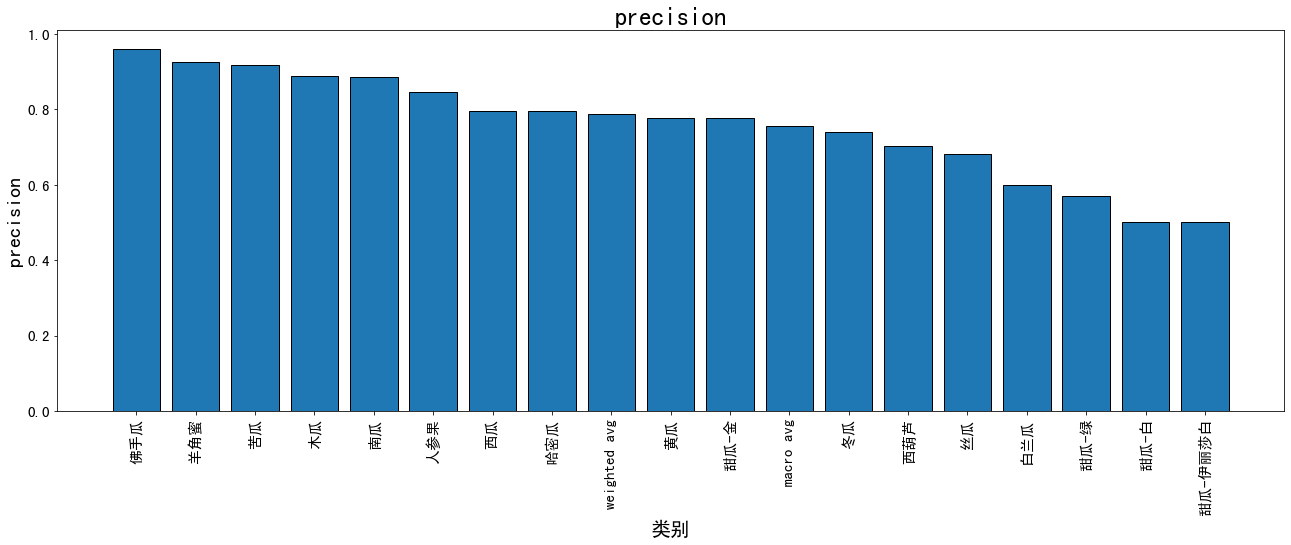

In [24]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

plt.bar(x, y, facecolor='#1f77b4', edgecolor='k')

plt.xticks(rotation=90)
plt.tick_params(labelsize=15)
plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title(feature, fontsize=25)

plt.savefig('各类别准确率评估指标柱状图.pdf', dpi=120, bbox_inches='tight')

plt.show()